#  Gruppuppgift Machine Learning
- Machine Learning - Kunskapskontroll 1

## Läser in data till Kunskapskontroll 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Data_path = "car_price_dataset.csv"

df_carprices_orig = pd.read_csv(Data_path, sep=';', encoding='cp1252')       # Hittade att det blev en kolumn, separerar csv-filens data med ;
df_carprices = df_carprices_orig.copy()                                 # Sparar en kopia av originaldataframen
    

### Dataset overview

In [2]:
df_carprices.info()     # Information om datatyper och icke-null värden i varje kolumn
# Inga nullvärden
# 10 000 rader
# 10 koumner
# test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [3]:
df_carprices.head(10)    # 10 första raderna i min dataframe med data från car_price_dataset.csv för att utforska datan

# Kategoriska kolumner: Brand, Model, Fuel_Type, Transmission
# Numeriska kolumner: Year, Mileage, Doors, Owner_Count, Engine_Size

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
5,Toyota,Camry,2007,2.7,Petrol,Automatic,157889,4,4,7242
6,Honda,Civic,2010,3.4,Electric,Automatic,139584,3,1,11208
7,Kia,Sportage,2001,4.7,Electric,Semi-Automatic,157495,2,2,7950
8,Kia,Sportage,2014,2.6,Hybrid,Manual,98700,3,4,9926
9,Toyota,RAV4,2005,3.1,Petrol,Manual,107724,2,5,6545


In [4]:
df_carprices.describe() # Statistisk sammanfattning av numeriska kolumner

# Möjliga Outliers: Mileage: min 25 och max 299 947, mean 149 239
# Diskreta variabler med få nivåer: Doors, Owner_Count
# Kategoriska variabler med många nivåer: Brand, Model
# Beroende variabel: Price
# Oberoende variabler: Year, Mileage, Doors, Owner_Count, Engine_Size, Brand, Model, Fuel_Type, Transmission

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
X = df_carprices.drop(columns=["Price"])        # Sätter alla kolumner utom målvariabeln Price i X
y = df_carprices["Price"]                       # Sätter kolumnen Price i målvariabeln y (target)

### Uppdelning av data i träningsdata och testdata

In [6]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=40)                 # delar upp data i 80% träning/validering och 20% test
X_train, X_val, y_train, y_val  = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=40)     # delar upp träingsdata i 75% träning (0.75 * 0.80 = 0.60 = 60% av hela datasetet) och 25% validering (0.25 * 0.80 = 0.20 = 20% av hela datasetet)

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

# tar fram olika versioner av X_train och X_val där jag tagit bort kolumnerna "doors" och/eller "owner_count" för att kunna jämföra modellernas prestanda med och utan dessa kolumner
X_train_drop_doors = X_train.drop(columns=["Doors"])
X_val_drop_doors   = X_val.drop(columns=["Doors"])

X_train_drop_owner = X_train.drop(columns=["Owner_Count"])
X_val_drop_owner   = X_val.drop(columns=["Owner_Count"])

X_train_drop_both = X_train.drop(columns=["Doors", "Owner_Count"])
X_val_drop_both   = X_val.drop(columns=["Doors", "Owner_Count"])


Train: (6000, 9) (6000,)
Val:   (2000, 9) (2000,)
Test:  (2000, 9) (2000,)


### Preprocessing av data

#### Förvandlar till numeriska kolumner

In [21]:
from sklearn.compose import ColumnTransformer                   
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Delar upp kolumner i kategoriska och numeriska
categorical_cols = ["Brand", "Model", "Fuel_Type", "Transmission"]              # Delar upp kolumnerna i icke siffor              
numeric_cols = [c for c in X_train.columns if c not in categorical_cols]        # Och kolumner med siffror

# Skapar en ColumnTransformer, en för linear modeller - väljer att kommentera bort denna för att använda den skalade versionen nedan
#ct_linear = ColumnTransformer(transformers=[
#        ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),        # För Categorical/kategori (text): gör om till siffror med One-Hot (0/1-kolumner) drop="first" för att undvika dummy-variabel-fälla, fungerar både till linear och tree modeller
#        ("numeric", "passthrough", numeric_cols),])                                                     # För numeriska kolumner: låt dem vara som de är ("passthrough")

# Skapar en ColumnTransformer med skalning för linear modeller
numeric_cols_base = [c for c in X_train.columns if c not in categorical_cols]
ct_scaled = ColumnTransformer(transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),        # För Categorical/kategori (text): gör om till siffror med One-Hot (0/1-kolumner) drop="first" för att undvika dummy-variabel-fälla
        ("numeric", StandardScaler(), numeric_cols_base)])                                                   # För numeriska kolumner: skala med StandardScaler (medelvärde 0, standardavvikelse 1)

# Utan Doors
numeric_cols_no_doors = [c for c in X_train_drop_doors.columns if c not in categorical_cols]
ct_scaled_no_doors = ColumnTransformer(transformers=[
    ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),
    ("numeric", StandardScaler(), numeric_cols_no_doors)
])

# Utan Owner_Count
numeric_cols_no_owner = [c for c in X_train_drop_owner.columns if c not in categorical_cols]
ct_scaled_no_owner = ColumnTransformer(transformers=[
    ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),
    ("numeric", StandardScaler(), numeric_cols_no_owner)
])

# Utan Doors + Owner_Count
numeric_cols_no_doors_owners = [c for c in X_train_drop_both.columns if c not in categorical_cols]
ct_scaled_no_doors_owners = ColumnTransformer(transformers=[
    ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),
    ("numeric", StandardScaler(), numeric_cols_no_doors_owners)
])

# Full modell med alla kolumner i X_train_full
numeric_cols_full = [c for c in X_train_full.columns if c not in categorical_cols]

ct_scaled_full = ColumnTransformer(transformers=[
    ("categorical", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_cols),
    ("numeric", StandardScaler(), numeric_cols_full)
])


# Skapar en ColumnTransformer, en för tree modeller - - väljer att kommentera bort denna då jag inte använder tree modeller i denna notebook
# ct_tree = ColumnTransformer(transformers=[  
#        ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_cols),                      # ColumnTransformer för tree modeller, ingen drop="first" här   
#        ("numeric", "passthrough", numeric_cols),])                                                     # För numeriska kolumner: låt dem vara som de är ("passthrough")

### EDA

In [8]:
# Kollar efter dubbletter i träningsdata
# 0 dubbletter
print("Duplicerade rader X_train:", X_train.duplicated().sum())

# Saknade värden (du har inga, men bra att visa)
print("\nMissing values (train):")
print(X_train.isna().sum().sort_values(ascending=False).head(10))

Duplicerade rader X_train: 0

Missing values (train):
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
dtype: int64


In [9]:
# Kollar unika värden i kategoriska kolumner
for col in ["Brand", "Model", "Fuel_Type", "Transmission"]:
    print("X_train", col, "unika:", X_train[col].nunique())


X_train Brand unika: 10
X_train Model unika: 30
X_train Fuel_Type unika: 4
X_train Transmission unika: 3


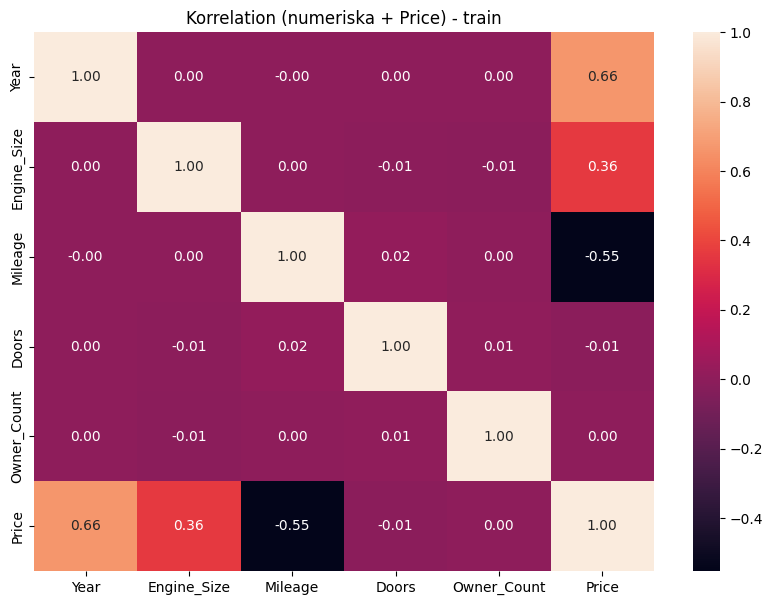

Korrelation med Price:
Price          1.000000
Year           0.663101
Engine_Size    0.360128
Owner_Count    0.001524
Doors         -0.013008
Mileage       -0.553248
Name: Price, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Korrelation mellan numeriska kolumner och Price i träningsdata

# Bygg df med numeriska X + Price
df_corr = X_train[numeric_cols].copy()
df_corr["Price"] = y_train  # behåll index, bättre än .values
corr = df_corr.corr(numeric_only=True)

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Korrelation (numeriska + Price) - train")
plt.show()

print("Korrelation med Price:")
print(corr["Price"].sort_values(ascending=False))

# Korrelations to Price observations:
# Price och Year: positiv korrelation (~0.66) → nyare bilar högre priser
# Price och Mileage: negativ korrelation (~-0.55) → högre körsträcka lägre priser
# Price och Engine_Size: positiv korrelation (~0.36) → större motor högre priser
# Doors och Owner_Count har ~0 korrelation med Price → inget tydligt linjärt samband i train.


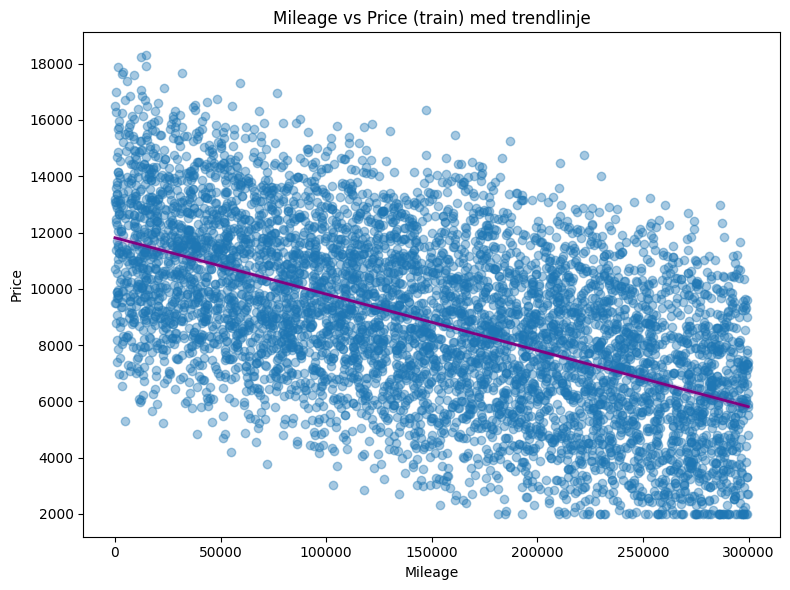

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot för att visualisera sambandet mellan Mileage och Price
plt.figure(figsize=(8,6))
sns.regplot(
    x=X_train["Mileage"],
    y=y_train,
    scatter_kws={"alpha": 0.4},
    line_kws={"color": "purple","linewidth": 2}
)
plt.title("Mileage vs Price (train) med trendlinje")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

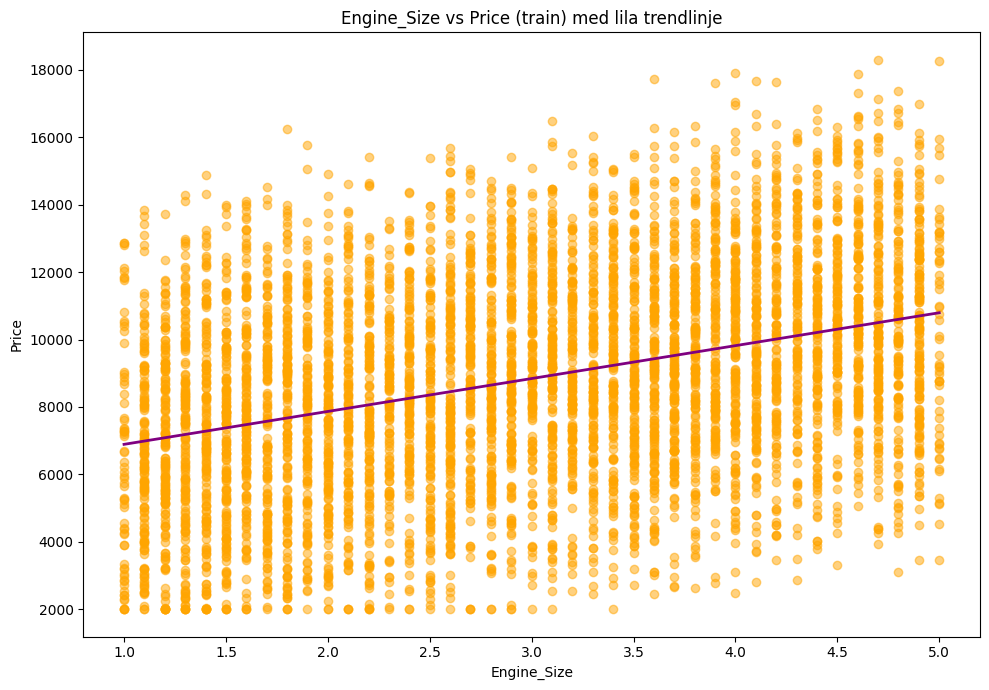

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.regplot(
    x=X_train["Engine_Size"],
    y=y_train,
    scatter_kws={"alpha": 0.5, "color": "orange"},
    line_kws={"color": "purple", "linewidth": 2},
    ci=None  # ta bort konfidensband (valfritt)
)
plt.title("Engine_Size vs Price (train) med lila trendlinje")
plt.xlabel("Engine_Size")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


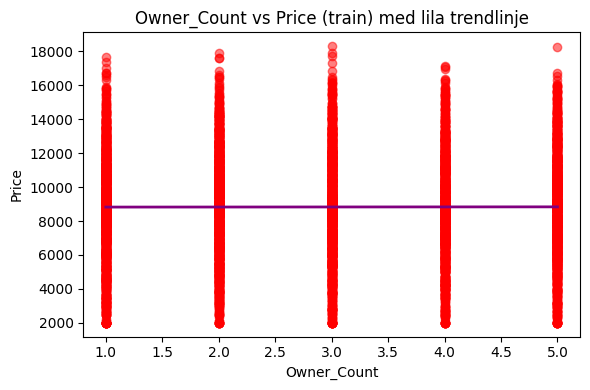

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.regplot(
    x=X_train["Owner_Count"],
    y=y_train,
    scatter_kws={"alpha": 0.5, "color": "red"},
    line_kws={"color": "purple", "linewidth": 2},
    ci=None
)
plt.title("Owner_Count vs Price (train) med lila trendlinje")
plt.xlabel("Owner_Count")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


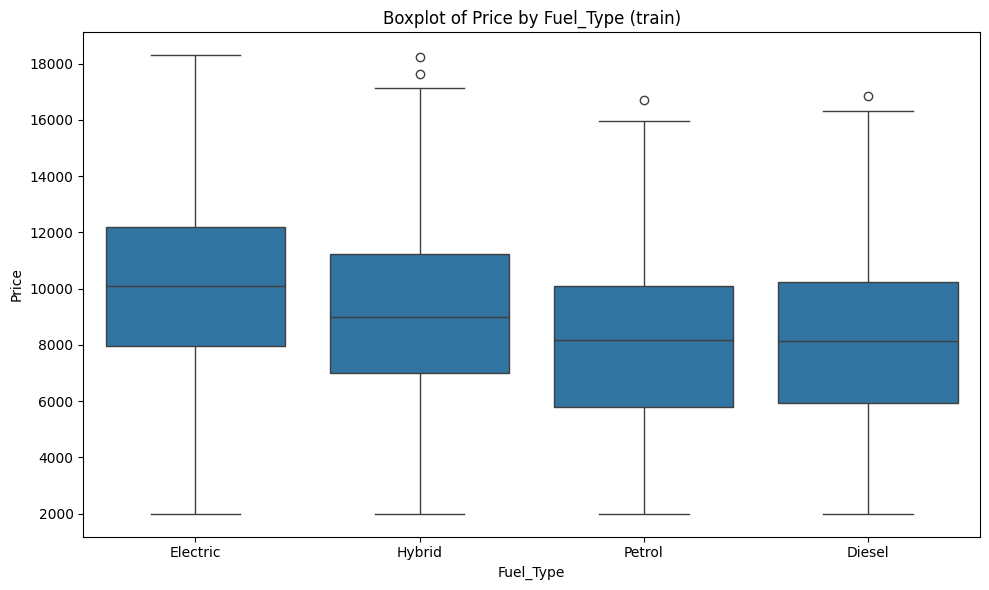

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(
    x=X_train["Fuel_Type"],
    y=y_train
)
plt.title("Boxplot of Price by Fuel_Type (train)")
plt.xlabel("Fuel_Type")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


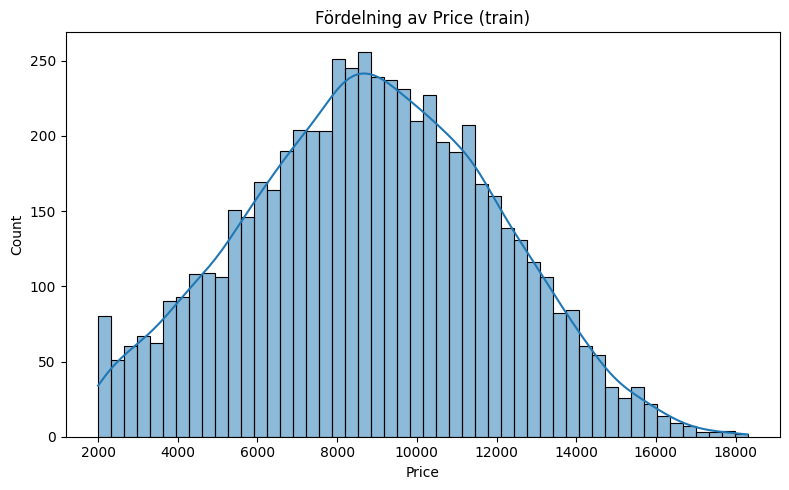

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(y_train, bins=50, kde=True)
plt.title("Fördelning av Price (train)")
plt.tight_layout()
plt.show()


#### Slutsatser från EDA:
1. Price verkar vara högerskev (positivt snedfördelad) med några höga outliers.
2. Year har tydlig positiv korrelation med Price, medan Mileage har tydlig negativ korrelation.
3. Engine_Size visar en svag–måttlig positiv relation till Price.
4. Doors och Owner_Count visar inget tydligt linjärt samband med Price i train.
5. Kategoriska variabler (Brand, Model, Fuel_Type, Transmission) visar prisskillnader mellan grupper.


## Skapa och Testa modeller

### LinearRegression (med ct_scaled)
__CV RMSE__: 73.42
__RMSE train__: 75.13, __RMSE val__:   88.08, __Gap__: 12.95
__Tid__: 5.06 sekunder

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score
import time

start = time.perf_counter()

pipe_lin = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", LinearRegression())
])

cv_rmse = -cross_val_score(pipe_lin, X_train, y_train,
                           scoring="neg_root_mean_squared_error", cv=5, n_jobs=-1).mean()
print("CV RMSE:", round(cv_rmse, 2))

pipe_lin.fit(X_train, y_train)

rmse_train = root_mean_squared_error(y_train, pipe_lin.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   pipe_lin.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


CV RMSE: 73.42
RMSE train: 75.13
RMSE val:   88.08
Gap: 12.95
Tid: 5.04 sekunder


## Lasso (med ct_scaled)
__Bästa alpha__: 0.1519911082952933, 
__Bästa CV RMSE__: 73.28900132926228
__RMSE train__: 75.21, __RMSE val__:   87.82, __Gap__: 12.61
__Tid__: 0.31 sekunder

In [17]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_lasso = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", Lasso(max_iter=20000))
])

param_grid = {
    "model__alpha": np.linspace(0.15, 0.35, 21)
    #ändrar och testar olika intervall för alpha än tidigare. tidigare 
    #np.linspace, 0.10, 0.50, 21
    #np.logspace,  -4, 1, 12 
    #np.logspace, -6, 2, 25
    #np.logspace, -2, 0, 20
}

gs = GridSearchCV(
    estimator=pipe_lasso,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa alpha:", gs.best_params_["model__alpha"])
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_

rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")

Bästa alpha: 0.24999999999999997
Bästa CV RMSE: 73.26736199536738
RMSE train: 75.26
RMSE val:   87.77
Gap: 12.51
Tid: 4.88 sekunder


#### Väljer bort, LinearSVR testades som alternativ linjär metod. Den gav ingen förbättring i val-RMSE och tar längre tid.
## LinearSVR
__Bästa params__: {'model__C': np.float64(1500.0), 'model__epsilon': 0, 'model__loss': 'squared_epsilon_insensitive'}
__Bästa CV RMSE__: 73.41100973129662
__RMSE train__: 75.13, __RMSE val__:   88.06, __Gap__: 12.93
__Tid__: 39.01 sekunder

#### Väljer bort, LinearSVR testades som alternativ linjär metod. Den gav ingen förbättring i val-RMSE och tar längre tid.
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_svr = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", LinearSVR(max_iter=50000, random_state=42))
])

C_values = np.unique(np.r_[np.logspace(-2, 3, 6), [50, 1500]])

param_grid = {
    "model__C": C_values,
    "model__epsilon": [0, 10, 25, 50, 100, 200, 500],
    "model__loss": ["epsilon_insensitive", "squared_epsilon_insensitive"]
}

gs = GridSearchCV(
    estimator=pipe_svr,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


#### Väljer bort, Val-RMSE var i princip oförändrad mellan de testade regulariserade varianterna, vilket tyder på att ytterligare finjustering med ElasticNet sannolikt inte ger praktisk vinst.
## ElasticNet (med ct_scaled)
__Bästa params__: {'model__alpha': np.float64(0.21544346900318823), 'model__l1_ratio': 1.0}, 
__Bästa CV RMSE__: 73.27202429297012
__RMSE train__: 75.24, __RMSE val__:   87.78, __Gap__: 12.54
__Tid__: 1.27 sekunder

#### Väljer bort, Val-RMSE var i princip oförändrad mellan de testade regulariserade varianterna, vilket tyder på att ytterligare finjustering med ElasticNet sannolikt inte ger praktisk vinst.

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_en = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", ElasticNet(max_iter=50000, random_state=42))
])

param_grid = {
    "model__alpha": np.logspace(-4, 2, 10),      # 1e-4 ... 1e2
    "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

gs = GridSearchCV(
    estimator=pipe_en,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


#### Väljer bort, Vid test av olika alpha visar det sig att bästa alpha är så liten att det inte fyller någon funktion att fortsätta med Ridge, utan kör på Linjear Regression istället.
## Ridge (med ct_scaled)
__Bästa alpha__: 0.001, 
__Bästa CV RMSE__: 73.4046086675257, 
__RMSE train__: 75.13, __RMSE val__:   88.08, __Gap__: 12.95
__Tid__: 6.99 sekunder


#### Väljer bort, Vid test av olika alpha visar det sig att bästa alpha är så liten att det inte fyller någon funktion att fortsätta med Ridge, utan kör på Linjear Regression istället.

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_ridge = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", Ridge())
])

param_grid = {
    "model__alpha": [0.00001, 0.00005, 0.0001, 0.00015]
}
# tar bort från hyperparametrar från param_grid efter test av bästa alpha: 0.0002, 0.0003, 0.0004,0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.01, 1, 15]

gs = GridSearchCV(
    estimator=pipe_ridge,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa alpha:", gs.best_params_["model__alpha"])
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_

rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")

#### Väljer bort pga hög RMSE och längre tid än linjära modellerna i testet
## GradientBoostingRegressor (med ct_tree)
__Bästa params__: {'model__learning_rate': 0.1, 'model__loss': 'squared_error', 'model__max_depth': 2, 'model__min_samples_leaf': 5, 'model__n_estimators': 600, 'model__subsample': 0.8}
__Bästa CV RMSE__: 142.13319505257354
__RMSE train__: 117.4, __RMSE val__:   138.54, __Gap__: 21.14, 
__Tid__: 49.66 sekunder

#### Väljer bort pga hög RMSE och längre tid än linjära modellerna i testet

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_gbr = Pipeline(steps=[
    ("prep", ct_tree),
    ("model", GradientBoostingRegressor(random_state=42))
])


param_grid = {
    "model__n_estimators": [300, 600],
    "model__learning_rate": [0.05, 0.1],
    "model__max_depth": [2, 3],
    "model__min_samples_leaf": [1, 5],
    "model__subsample": [0.8, 1.0],
    "model__loss": ["squared_error"]
}

gs = GridSearchCV(
    estimator=pipe_gbr,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


#### Väljer bort pga hög RMSE och lång tid att köra
## RandomForest (med ct_tree)
__RMSE train__: 133.77, __RMSE val__:   353.77, __Gap__: 220.01
__Tid__: 204.29 sekunder

#### Väljer bort pga hög RMSE och lång tid att köra

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_rf = Pipeline(steps=[
    ("prep", ct_tree),
    ("model", RandomForestRegressor(random_state=42, n_jobs=-1))
])

param_grid = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 5],
    "model__min_samples_split": [2, 10],
    "model__max_features": ["sqrt", 0.5]
}

gs = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=1,         
    verbose=2
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))


stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


#### Väljer bort, Val-RMSE var i princip oförändrad mellan de testade regulariserade varianterna, vilket tyder på att ytterligare finjustering med ElasticNet sannolikt inte ger praktisk vinst.
## ElasticNet (med ct_scaled)
__Bästa params__: {'model__alpha': np.float64(0.21544346900318823), 'model__l1_ratio': 1.0}, 
__Bästa CV RMSE__: 73.27202429297012
__RMSE train__: 75.24, __RMSE val__:   87.78, __Gap__: 12.54
__Tid__: 1.27 sekunder
#### Väljer bort, Val-RMSE var i princip oförändrad mellan de testade regulariserade varianterna, vilket tyder på att ytterligare finjustering med ElasticNet sannolikt inte ger praktisk vinst.

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error
import time

start = time.perf_counter()

pipe_en = Pipeline(steps=[
    ("prep", ct_scaled),
    ("model", ElasticNet(max_iter=50000, random_state=42))
])

param_grid = {
    "model__alpha": np.logspace(-4, 2, 10),      # 1e-4 ... 1e2
    "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

gs = GridSearchCV(
    estimator=pipe_en,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train, y_train)

print("Bästa params:", gs.best_params_)
print("Bästa CV RMSE:", -gs.best_score_)

best_pipe = gs.best_estimator_
rmse_train = root_mean_squared_error(y_train, best_pipe.predict(X_train))
rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(X_val))

print("RMSE train:", round(rmse_train, 2))
print("RMSE val:  ", round(rmse_val, 2))
print("Gap:", round(rmse_val - rmse_train, 2))

stop = time.perf_counter()
elapsed = stop - start
print(f"Tid: {elapsed:.2f} sekunder")


### Går vidare med LinearRegression, Lasso för att testa vidare på modeller.
En gång utan Doors, En gång med Doors men utan Owner_Count och en tredje gången utan Doors och Owner_count. 

In [18]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import cross_val_score

tests = [
    ("Baseline (alla kolumner)", X_train, X_val, ct_scaled),
    ("Utan Doors", X_train_drop_doors, X_val_drop_doors, ct_scaled_no_doors),
    ("Utan Owner_Count", X_train_drop_owner, X_val_drop_owner, ct_scaled_no_owner),
    ("Utan Doors + Owner_Count", X_train_drop_both, X_val_drop_both, ct_scaled_no_doors_owners),
]

rows = []
for name, Xt, Xv, ct in tests:
    pipe = Pipeline(steps=[
        ("prep", ct),
        ("model", LinearRegression())
    ])

    cv_rmse = -cross_val_score(
        pipe, Xt, y_train,
        scoring="neg_root_mean_squared_error",
        cv=5,
        n_jobs=-1
    ).mean()

    pipe.fit(Xt, y_train)
    rmse_train = root_mean_squared_error(y_train, pipe.predict(Xt))
    rmse_val   = root_mean_squared_error(y_val,   pipe.predict(Xv))

    rows.append({
        "Variant": name,
        "Features": Xt.shape[1],
        "CV_RMSE": cv_rmse,
        "RMSE_train": rmse_train,
        "RMSE_val": rmse_val,
        "Gap": rmse_val - rmse_train
    })

df_results = pd.DataFrame(rows)
df_results[["CV_RMSE","RMSE_train","RMSE_val","Gap"]] = df_results[["CV_RMSE","RMSE_train","RMSE_val","Gap"]].round(2)

# (Valfritt) lägg till skillnad mot baseline för val-RMSE
baseline_val = df_results.loc[df_results["Variant"].str.contains("Baseline"), "RMSE_val"].iloc[0]
df_results["Delta_val_vs_baseline"] = (df_results["RMSE_val"] - baseline_val).round(2)

df_results.sort_values("RMSE_val")


,Variant,Features,CV_RMSE,RMSE_train,RMSE_val,Gap,Delta_val_vs_baseline
3,Utan Doors + Owner_Count,7,73.41,75.13,88.04,12.91,-0.04
2,Utan Owner_Count,8,73.42,75.13,88.04,12.91,-0.04
1,Utan Doors,8,73.41,75.13,88.08,12.95,0.00
0,Baseline (alla kolumner),9,73.42,75.13,88.08,12.95,0.00


In [19]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

tests = [
    ("Baseline (alla kolumner)", X_train, X_val, ct_scaled),
    ("Utan Doors", X_train_drop_doors, X_val_drop_doors, ct_scaled_no_doors),
    ("Utan Owner_Count", X_train_drop_owner, X_val_drop_owner, ct_scaled_no_owner),
    ("Utan Doors + Owner_Count", X_train_drop_both, X_val_drop_both, ct_scaled_no_doors_owners),
]

param_grid = {"model__alpha": np.linspace(0.15, 0.35, 21)}

rows = []
for name, Xt, Xv, ct in tests:
    pipe = Pipeline(steps=[
        ("prep", ct),
        ("model", Lasso(max_iter=20000))
    ])

    gs = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        scoring="neg_root_mean_squared_error",
        cv=5,
        n_jobs=-1
    )

    gs.fit(Xt, y_train)
    best_pipe = gs.best_estimator_

    rmse_train = root_mean_squared_error(y_train, best_pipe.predict(Xt))
    rmse_val   = root_mean_squared_error(y_val,   best_pipe.predict(Xv))

    rows.append({
        "Variant": name,
        "Features": Xt.shape[1],
        "Best_alpha": gs.best_params_["model__alpha"],
        "CV_RMSE": -gs.best_score_,
        "RMSE_train": rmse_train,
        "RMSE_val": rmse_val,
        "Gap": rmse_val - rmse_train
    })

df_lasso_gs = pd.DataFrame(rows)
df_lasso_gs[["Best_alpha","CV_RMSE","RMSE_train","RMSE_val","Gap"]] = df_lasso_gs[["Best_alpha","CV_RMSE","RMSE_train","RMSE_val","Gap"]].round(2)

baseline_val = df_lasso_gs.loc[df_lasso_gs["Variant"].str.contains("Baseline"), "RMSE_val"].iloc[0]
df_lasso_gs["Delta_val_vs_baseline"] = (df_lasso_gs["RMSE_val"] - baseline_val).round(2)

df_lasso_gs.sort_values("RMSE_val")


,Variant,Features,Best_alpha,CV_RMSE,RMSE_train,RMSE_val,Gap,Delta_val_vs_baseline
3,Utan Doors + Owner_Count,7,0.25,73.27,75.26,87.75,12.49,-0.02
2,Utan Owner_Count,8,0.25,73.27,75.26,87.75,12.49,-0.02
1,Utan Doors,8,0.25,73.26,75.26,87.77,12.51,0.00
0,Baseline (alla kolumner),9,0.25,73.27,75.26,87.77,12.51,0.00


Slutsats Feature removal: Borttag av doors, owner_count gav ingen signifikant förbättring. Därför behålls originaluppsättningen.

Bästa modell marginellt bästa RMSE: Lasso, går vidare med den i nästa steg. 

## Test av både träningsdata och valideringsdata på min Lasso-modell.

In [23]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

# 1) Bygg pipeline (med ct_scaled_full)
pipe_lasso = Pipeline(steps=[
    ("prep", ct_scaled_full),
    ("model", Lasso(max_iter=20000))
])

# 2) Grid över alpha (du kan behålla din)
param_grid = {"model__alpha": np.linspace(0.15, 0.35, 21)}

# 3) GridSearch med CV på train_full
gs = GridSearchCV(
    estimator=pipe_lasso,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    n_jobs=-1
)

gs.fit(X_train_full, y_train_full)

print("Bästa alpha:", gs.best_params_["model__alpha"])
print("Bästa CV RMSE:", round(-gs.best_score_, 2))

# 4) Slutmodell = bästa pipeline (tränad på hela train_full)
best_pipe = gs.best_estimator_

# 5) Rapportera RMSE på train_full (valfritt, för att se fit)
rmse_train_full = root_mean_squared_error(y_train_full, best_pipe.predict(X_train_full))
print("RMSE train_full:", round(rmse_train_full, 2))

# 6) Slutlig utvärdering på test (detta är “sanna” resultatet)
rmse_test = root_mean_squared_error(y_test, best_pipe.predict(X_test))
print("RMSE test:", round(rmse_test, 2))

# (valfritt) gap
print("Gap (test - train_full):", round(rmse_test - rmse_train_full, 2))


Bästa alpha: 0.30999999999999994
Bästa CV RMSE: 77.58
RMSE train_full: 78.58
RMSE test: 109.8
Gap (test - train_full): 31.22


In [25]:
import numpy as np
from sklearn.metrics import root_mean_squared_error

baseline_pred = np.full_like(y_test, fill_value=y_train_full.mean(), dtype=float)
rmse_baseline = root_mean_squared_error(y_test, baseline_pred)

print("Baseline RMSE (mean prediction):", round(rmse_baseline, 2))
print("Din Lasso test RMSE:", 109.8)
print("Förbättring:", round(rmse_baseline - 109.8, 2))

print("y_train_full mean/std:", round(y_train_full.mean(),2), round(y_train_full.std(),2))
print("y_test mean/std:      ", round(y_test.mean(),2), round(y_test.std(),2))



Baseline RMSE (mean prediction): 3122.18
Din Lasso test RMSE: 109.8
Förbättring: 3012.38
y_train_full mean/std: 8830.9 3110.29
y_test mean/std:       8941.21 3121.01


# Slutsats

Valde Lasso som slutmodell med 5-fold cross-validation på train_full (CV RMSE ≈ 77.6). 
Körde modellen på train_full och fick nästan samma fel (RMSE ≈ 78.6), så modellen verkar stabil och inte överanpassad på träningsdatan.
Utvärdering på test-setet blev RMSE ≈ 109.8, alltså högre än CV-resultatet. Det betyder att cross-validation blev lite optimistisk i just den här uppdelningen, men modellen presterar fortfarande väldigt bra på ny data. Det syns också genom att den slår en enkel baseline (att bara gissa medelvärdet) med stor marginal.
Test-RMSE ≈ 109.8 blir slutresultat.